In [1]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt


In [2]:
chn_gdp_seq = []
chn_per_seq = []

mer_gdp_seq = []
mer_per_seq = []

with open('/home/yangwenhao/local/project/SpeakerVerification-pytorch/misc/gdp.txt', 'r') as f:
    for l in f.readlines():
        if len(l)>0:
            try:
                year, _, chn_gdp, chn_per, _, mer_gdp, mer_per = l.split()
                
                year = int(year)

                chn_gdp = chn_gdp.strip("\(\)")
                chn_gdp = chn_gdp.replace(',', '')
                chn_gdp = float(chn_gdp)
                chn_gdp_seq.append([year, chn_gdp])

                chn_per = chn_per.strip("%")
                chn_per = float(chn_per)
                chn_per_seq.append([year, chn_per])


                mer_gdp = mer_gdp.strip("\(\)")
                mer_gdp = mer_gdp.replace(',', '')
                mer_gdp = float(mer_gdp)
                mer_gdp_seq.append([year, mer_gdp])

                mer_per = mer_per.strip("%")
                mer_per = float(mer_per)
                mer_per_seq.append([year, mer_per])
            except Exception as e:
                continue

In [3]:
la = '2020    14.72万亿 (14,722,730,697,890)    17.3863%    20.89万亿 (20,893,746,000,000)    24.6738%'

In [4]:
la_sp = la.split()
print(la_sp)

['2020', '14.72万亿', '(14,722,730,697,890)', '17.3863%', '20.89万亿', '(20,893,746,000,000)', '24.6738%']


In [5]:
ls_st = la_sp[2].strip(",\(\)")
ls_st.replace(',', '')

'14722730697890'

In [14]:
chn_year_gdp = np.sort(np.array(chn_gdp_seq), axis=0) 
mer_year_gdp = np.sort(np.array(mer_gdp_seq), axis=0) 

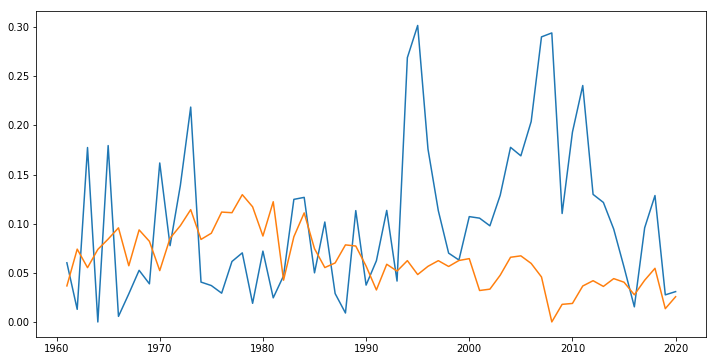

In [29]:
plt.figure(figsize=(12, 6))

for gdp in [chn_year_gdp, mer_year_gdp]:
    the_gdp = gdp[:, 1]
    gdp_add = (the_gdp[1:]-the_gdp[:-1]) / the_gdp[:-1]
    plt.plot(gdp[:, 0][1:], gdp_add)# chn_year_gdp_add = [ for i in range(1, len(chn_year_gdp[:,1]))]

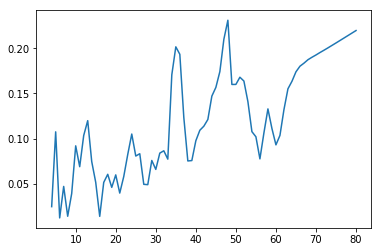

In [48]:
chn_add_res = AutoReg(chn_gdp_add, lags=4, trend='t')
chn_add_fit = chn_add_res.fit()

chn_add_pre = chn_add_fit.predict(start=0, end=80)
plt.plot(chn_add_pre)

In [21]:
chn_res = AutoReg(chn_year_gdp[:,1], lags=5, trend='t')
chn_fit = chn_res.fit()

mer_res = AutoReg(mer_year_gdp[:,1], lags=5, trend='t')
mer_fit = mer_res.fit()

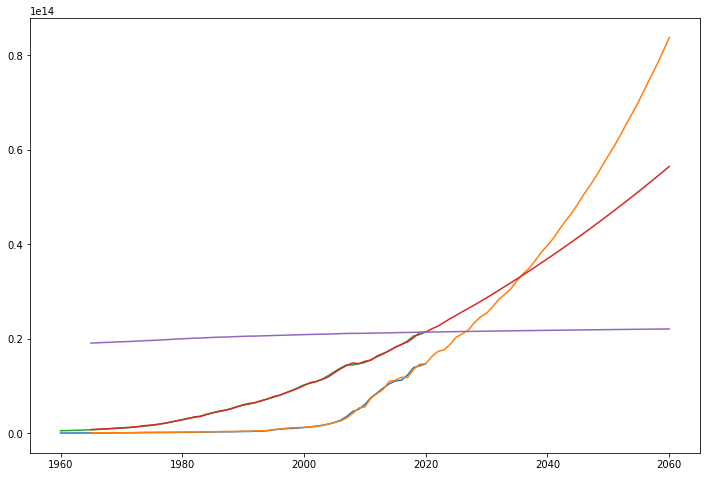

In [44]:
plt.figure(figsize=(12, 8))

chn_pre = chn_fit.predict(start=0, end=100)

plt.plot(chn_year_gdp[:,0], chn_year_gdp[:,1])
plt.plot(np.arange(1960, 2061), chn_pre)


mer_pre = mer_fit.predict(start=0, end=100)

plt.plot(mer_year_gdp[:,0], mer_year_gdp[:,1])
plt.plot(np.arange(1960, 2061), mer_pre)
plt.plot(np.arange(1960, 2061), np.log(mer_pre)*(mer_pre[60]/np.log(mer_pre)[60]))

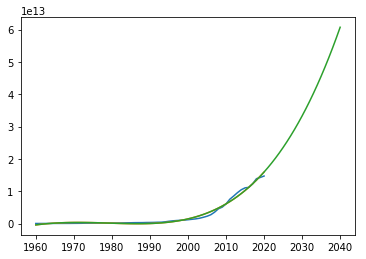

In [39]:
z1 = np.polyfit(chn_year_gdp[:,0], chn_year_gdp[:,1], 4) # 用7次多项式拟合，可改变多项式阶数；
z2 = np.polyfit(chn_year_gdp[:,0], chn_year_gdp[:,1], 3) # 用7次多项式拟合，可改变多项式阶数；

p1 = np.poly1d(z1)
p2 = np.poly1d(z2)

yvals=(p1(chn_year_gdp[:,0]) + p2(chn_year_gdp[:,0]))/2

plt.plot(chn_year_gdp[:,0], chn_year_gdp[:,1])
plt.plot(chn_year_gdp[:,0], yvals)

yvals=(p1(np.arange(1960, 2041))+ p2(np.arange(1960, 2041)))/2
plt.plot(np.arange(1960, 2041), yvals)

In [11]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/home/yangwenhao/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.53942033 1.01594454]]


/home/yangwenhao/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
